In [49]:
import numpy as np               
import pandas as pd              
import seaborn as sns             
from scipy import stats         
import calendar
from datetime import datetime   
import matplotlib.pyplot as plt 
%matplotlib inline

import math


In [2]:
import os
print(os.listdir("../Bike Sharing Demand"))

['.ipynb_checkpoints', 'Bike Sharing Demand.ipynb', 'test.zip', 'train.zip']


In [98]:
train = pd.read_csv('train.zip')
test = pd.read_csv('test.zip')

In [99]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


(10886, 12)

In [6]:
test.info()
print('test dat is looks like this:', test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB
test dat is looks like this: (6493, 9)


### Cleaning the data

###### season, holiday, workingday, weather, casual, should be categorical??


In [7]:
check_vari = ['season', 'holiday', 'workingday', 'weather']

for i in check_vari: 
    print(i + ":" )
    print(set(train[i]))
    print('\n')

season:
{1, 2, 3, 4}


holiday:
{0, 1}


workingday:
{0, 1}


weather:
{1, 2, 3, 4}




In [8]:
train['weather'].value_counts() #?? why so many 1 but only 1 for 4? lets check later!

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [9]:
train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [10]:
# Checking for the uniq values. 
len(set(train['datetime'])) # they all uniq values

10886

In [11]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

###### Create new columns "date", "year", "month", "day", "hour", and "weekday" from "datetime" column.

In [12]:
train['date'] = train.datetime.apply(lambda x: x.split()[0])
train['hour'] = train.datetime.apply(lambda x: x.split()[1].split(':')[1])

train['year'] = train.date.apply(lambda x:x.split('-')[0])
train['month'] = train.date.apply(lambda x:x. split('-')[1])
train['day'] = train.date.apply(lambda x:x.split('-')[2])
train['hour'] = train.datetime.apply(lambda x:x.split()[1].split(':')[0])

# finally turn the date into date date instead of leaving it as obj. 
train['date'] = pd.to_datetime(train['date'], errors = 'coerce')

print(set(train.year))
print(set(train.month))
print(set(train.day))
print(set(train.hour))

{'2012', '2011'}
{'01', '06', '05', '09', '12', '02', '07', '11', '04', '10', '03', '08'}
{'01', '06', '12', '02', '15', '09', '18', '05', '11', '16', '08', '19', '14', '17', '10', '13', '03', '07', '04'}
{'01', '00', '06', '12', '02', '21', '15', '09', '18', '05', '11', '16', '08', '19', '14', '17', '10', '13', '03', '22', '23', '07', '04', '20'}


In [357]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null datetime64[ns]
hour          10886 non-null object
year          10886 non-null object
month         10886 non-null object
day           10886 non-null object
dtypes: datetime64[ns](1), float64(3), int64(8), object(5)
memory usage: 1.4+ MB


In [13]:
# for weekday: use the calendar and datetime! 
#train['weekday'] = train.date.apply(lambda x:calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])
#print(set(train['weekday']))

train['weekday'] = train['date'].apply(lambda  x:x.weekday())
train.weekday.value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: weekday, dtype: int64

In [14]:
# its better to have them as numerical category than str category so lets convert them now. 

#train['weekday'] = train.weekday.astype('category')
#print(train['weekday'].cat.categories)

In [15]:
# now transforming the column weekday to numerical cateogry 

#train.weekday.cat.categories = ['5','1', '6','7','4','2','3']
#print(train.weekday.cat.categories)

In [361]:
# final check if they are converted right
train.info()

#.. they not in right type: int. convert them! may be using new method is not just hassle but requires more work toward to the end such as converting them into int and such 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null datetime64[ns]
hour          10886 non-null object
year          10886 non-null object
month         10886 non-null object
day           10886 non-null object
weekday       10886 non-null category
dtypes: category(1), datetime64[ns](1), float64(3), int64(8), object(5)
memory usage: 1.4+ MB


In [16]:
#train['year'] = pd.to_numeric(train.year,errors='coerce')
#train['month'] = pd.to_numeric(train.month,errors='coerce')
#train['day'] = pd.to_numeric(train.day,errors='coerce')
#train['hour'] = pd.to_numeric(train.hour,errors='coerce')

train.year = train.year.astype('int')
train.month = train.month.astype('int')
train.day = train.day.astype('int')
train.hour = train.hour.astype('int')

# and drop the column : 
#train = train.drop(["datetime"],axis=1) # this can be done by del train['datetime'] 
# train.info()

NOW, convert the int to factors: season, holiday, weakday, workingday, and weather but use for loop this time...

In [17]:
convert_vari = ['season', 'holiday', 'weekday', 'workingday', 'weather']

for i in convert_vari: 
    train[i] = train[i].astype('category')
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
datetime      10886 non-null object
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null datetime64[ns]
hour          10886 non-null int32
year          10886 non-null int32
month         10886 non-null int32
day           10886 non-null int32
weekday       10886 non-null category
dtypes: category(5), datetime64[ns](1), float64(3), int32(4), int64(4), object(1)
memory usage: 989.7+ KB


###### Simple plots: counts (y) ~ time related variables ('year', 'month', 'day', 'hour', 'season', 'workingday', 'holiday', 'weekday', 'weather')

In [54]:
def bar_plot(x):
    
    fig, axes = plt.subplots(nrows= math.floor(len(x)/2),ncols=2)
    fig.set_size_inches(12, 14)
    
    pp1 = sns.barplot(x = x[0], y = 'count', data = train.groupby(x[0])['count'].mean().reset_index(), orient = 'v', ax= axes[0][0])
    pp2 = sns.barplot(x = x[1], y = 'count', data = train.groupby(x[1])['count'].mean().reset_index(), orient = 'v', ax= axes[0][1])
    pp3 = sns.barplot(x = x[2], y = 'count', data = train.groupby(x[2])['count'].mean().reset_index(), orient = 'v', ax= axes[1][0])
    pp4 = sns.barplot(x = x[3], y = 'count', data = train.groupby(x[3])['count'].mean().reset_index(), orient = 'v', ax= axes[1][1]) 
    pp5 = sns.barplot(x = x[4], y = 'count', data = train.groupby(x[4])['count'].mean().reset_index(), orient = 'v', ax= axes[2][0]) 
    pp6 = sns.barplot(x = x[5], y = 'count', data = train.groupby(x[5])['count'].mean().reset_index(), orient = 'v', ax= axes[2][1]) 
    pp7 = sns.barplot(x = x[6], y = 'count', data = train.groupby(x[6])['count'].mean().reset_index(), orient = 'v', ax= axes[3][0]) 
    pp8 = sns.barplot(x = x[7], y = 'count', data = train.groupby(x[7])['count'].mean().reset_index(), orient = 'v', ax= axes[3][1]) 
    
    

    
    plt.show()
    

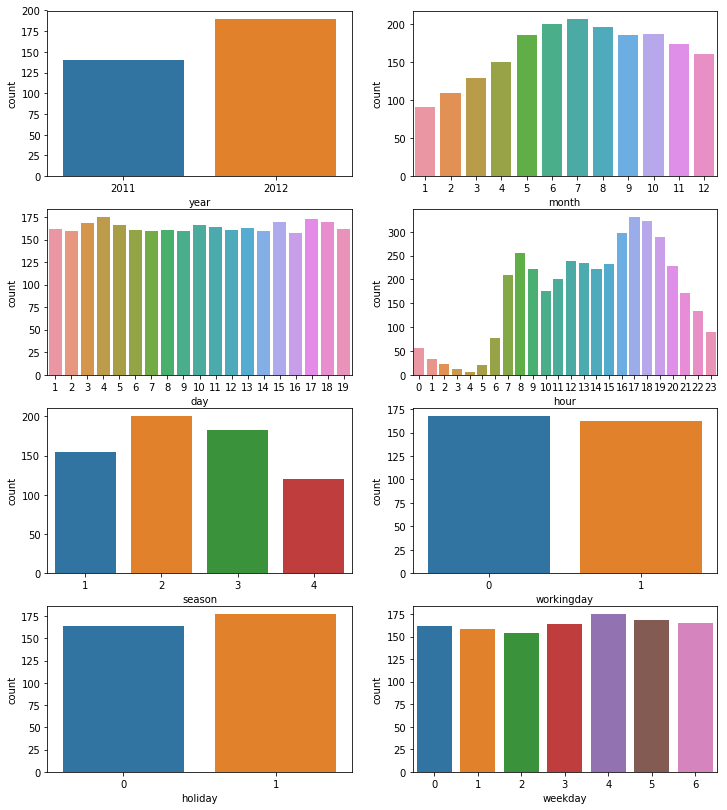

In [55]:
x = ['year', 'month', 'day', 'hour', 'season', 'workingday', 'holiday', 'weekday','weather']

bar_plot(x = x)

In [53]:
def box_plot(x, title = False):
    
    fig, axes = plt.subplots(nrows= math.floor(len(x)/2),ncols=2)
    fig.set_size_inches(12, 14)
    
    if title == True:
        sns.boxplot(data=train,y="count",x=x[0]).set(ylabel='Count',title= str(x[0]))
        sns.boxplot(data=train,y="count",x=x[1],orient="v",ax=axes[0][1]).set(ylabel='Count',title= str(x[1]))
        sns.boxplot(data=train,y="count",x=x[2],orient="v",ax=axes[1][0]).set(ylabel='Count',title= str(x[2]))
        sns.boxplot(data=train,y="count",x=x[3],orient="v",ax=axes[1][1]).set(ylabel='Count',title= str(x[3]))
        sns.boxplot(data=train,y="count",x=x[4],orient="v",ax=axes[2][0]).set(ylabel='Count',title= str(x[4]))
        sns.boxplot(data=train,y="count",x=x[5],orient="v",ax=axes[2][1]).set(ylabel='Count',title= str(x[5]))
        sns.boxplot(data=train,y="count",x=x[6],orient="v",ax=axes[3][0]).set(ylabel='Count',title= str(x[6]))
        sns.boxplot(data=train,y="count",x=x[7],orient="v",ax=axes[3][1]).set(ylabel='Count',title= str(x[7]))
    else: 
        sns.boxplot(data=train,y="count",x=x[0],orient="v",ax=axes[0][0])
        sns.boxplot(data=train,y="count",x=x[1],orient="v",ax=axes[0][1])
        sns.boxplot(data=train,y="count",x=x[2],orient="v",ax=axes[1][0])
        sns.boxplot(data=train,y="count",x=x[3],orient="v",ax=axes[1][1])
        sns.boxplot(data=train,y="count",x=x[4],orient="v",ax=axes[2][0])
        sns.boxplot(data=train,y="count",x=x[5],orient="v",ax=axes[2][1])
        sns.boxplot(data=train,y="count",x=x[6],orient="v",ax=axes[3][0])
        sns.boxplot(data=train,y="count",x=x[7],orient="v",ax=axes[3][1])
        
    plt.show()

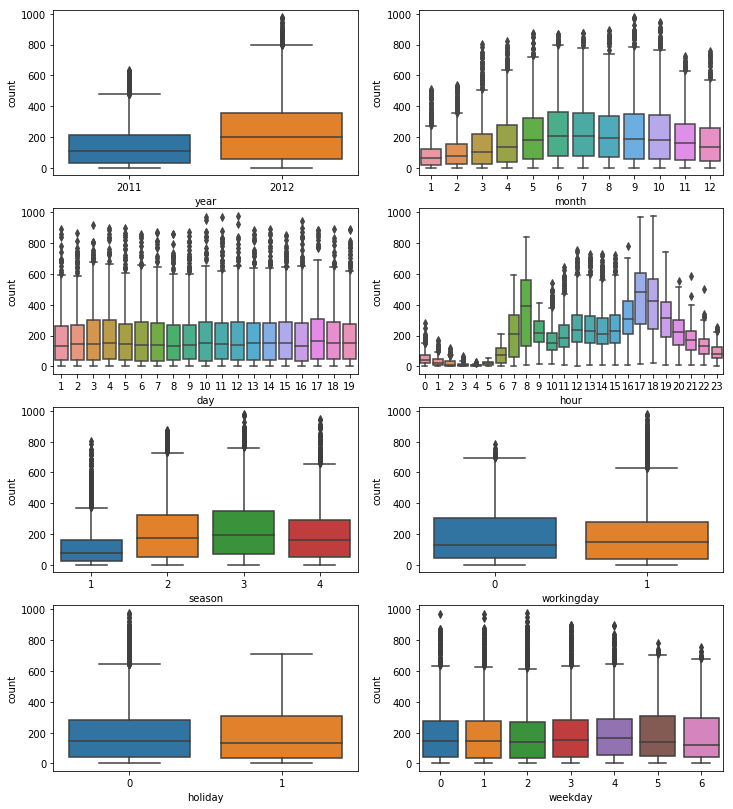

In [21]:
x = ['year', 'month', 'day', 'hour', 'season', 'workingday', 'holiday', 'weekday','weather']

box_plot(x = x)

In [35]:
# simple pivot table: 
x = ['year', 'month', 'day', 'hour', 'season', 'workingday', 'holiday', 'weekday','weather']
def pivot_tab(val): 
    tab = pd.pivot_table(train, values = ['count'], index = [val], aggfunc = np.mean)
    return(tab)

for i in (x):
    print(pivot_tab(i))

           count
year            
2011  144.223349
2012  238.560944
            count
month            
1       90.366516
2      110.003330
3      148.169811
4      184.160616
5      219.459430
6      242.031798
7      235.325658
8      234.118421
9      233.805281
10     227.699232
11     193.677278
12     175.614035
          count
day            
1    180.333913
2    183.910995
3    194.696335
4    195.705575
5    189.765217
6    189.860140
7    183.773519
8    179.041812
9    187.897391
10   195.183566
11   195.679577
12   190.675393
13   194.160279
14   195.829268
15   201.527875
16   191.353659
17   205.660870
18   192.605684
19   192.311847
           count
hour            
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18  

Now, take a look at the relationship with count and the weather related:['temp', 'atemp', 'humidity', 'windspeed']

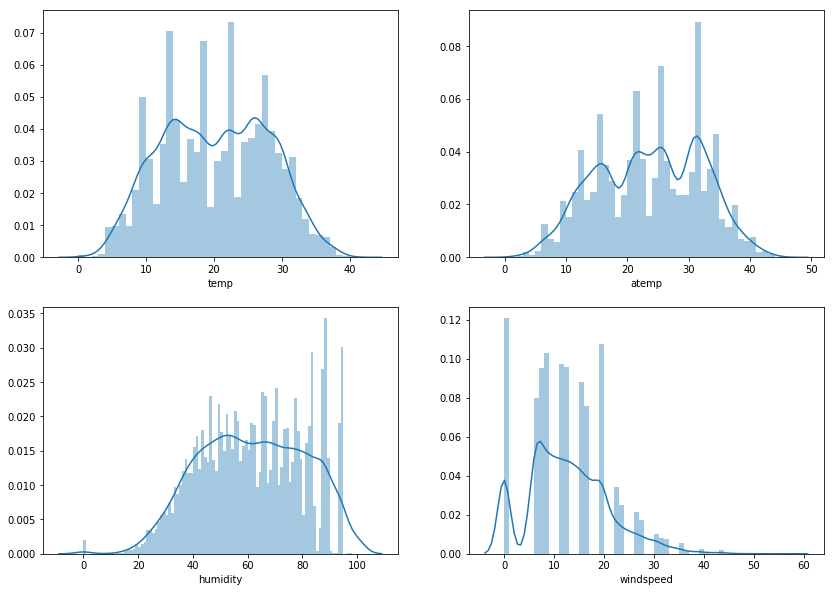

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(14, 10)

p1 = sns.distplot(train.temp, bins = range(train.temp.min().astype('int'), train.temp.max().astype('int')), ax= axes[0][0])
p2 = sns.distplot(train.atemp, bins = range(train.atemp.min().astype('int'), train.atemp.max().astype('int')), ax= axes[0][1])
p3 = sns.distplot(train.humidity, bins = range(train.humidity.min().astype('int'), train.humidity.max().astype('int')), ax= axes[1][0])
p4 = sns.distplot(train.windspeed, bins = range(train.windspeed.min().astype('int'), train.windspeed.max().astype('int')), ax= axes[1][1])

plt.show()
    

There are too many 0 in the winspeed? check it later! 
plot it by hourly based counts based on season, holiday, weekday, and weather

In [83]:
def point_plot_by(time, val):
    
    pp, axes = plt.subplots(nrows= 2, ncols=2)
    pp.set_size_inches(14, 10)
    
    p1 = sns.pointplot(x=time,y='count',hue=val[0],data=train.groupby([val[0],time])['count'].mean().reset_index(), ax = axes[0][0])
    p2 = sns.pointplot(x=time,y='count',hue=val[1],data=train.groupby([val[1],time])['count'].mean().reset_index(), ax = axes[0][1])
    p3 = sns.pointplot(x=time,y='count',hue=val[2],data=train.groupby([val[2],time])['count'].mean().reset_index(), ax = axes[1][0])
    p4 = sns.pointplot(x=time,y='count',hue=val[3],data=train.groupby([val[3],time])['count'].mean().reset_index(), ax = axes[1][1])
    
    plt.show()

this time plot it by monthly based count by the same 

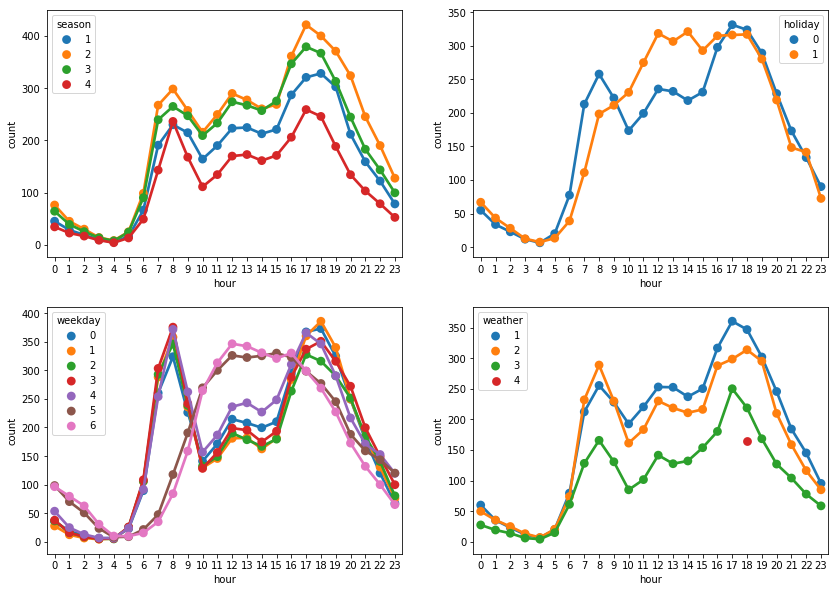

In [84]:
x = ['season', 'holiday', 'weekday', 'weather']
point_plot_by(time = 'hour', val = x)

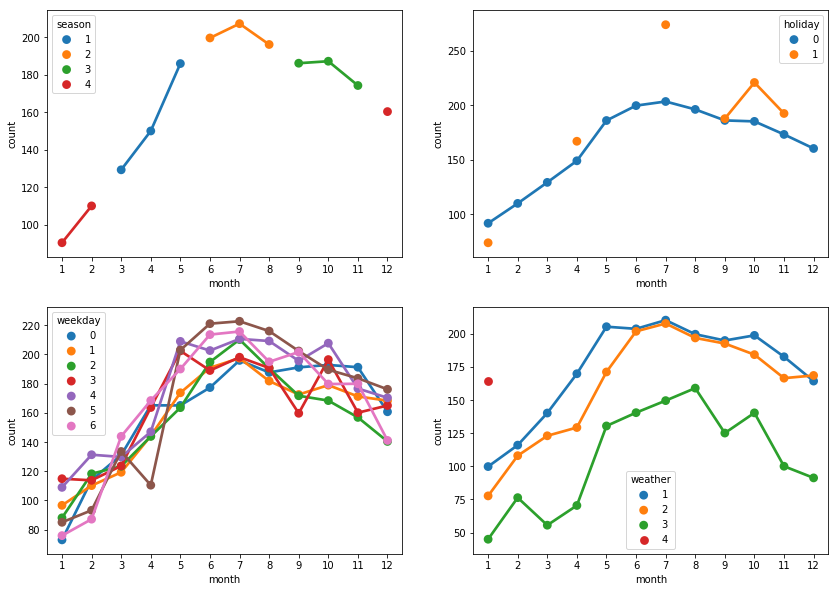

In [85]:
point_plot_by(time= 'month', val= x)

Now check on the Y, independent variable! 

In [26]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

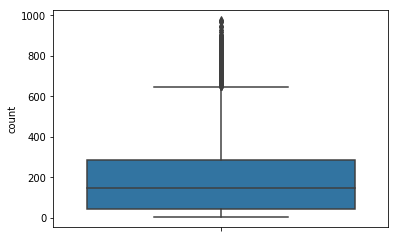

In [27]:
sns.boxplot(data=train,y="count") # ok let's start by cleaning the outliers! 

In [192]:
clean_train = train[np.abs(train["count"] - train["count"].mean())<=(3*train["count"].std())] 
# here apply 3 sigma rules! to wipe the outliers



KeyError: 'count'

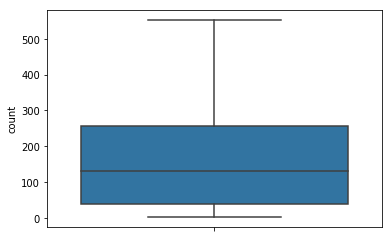

In [29]:
sns.boxplot(data=clean_train,y="count")

From the previous value_counts() for weather, I thought it was bit weird to have such a biased days. So, I looked up the descriptions and following is the description of the weather. And, it makes sense!

Skewness :0.781
Kurt : -0.316


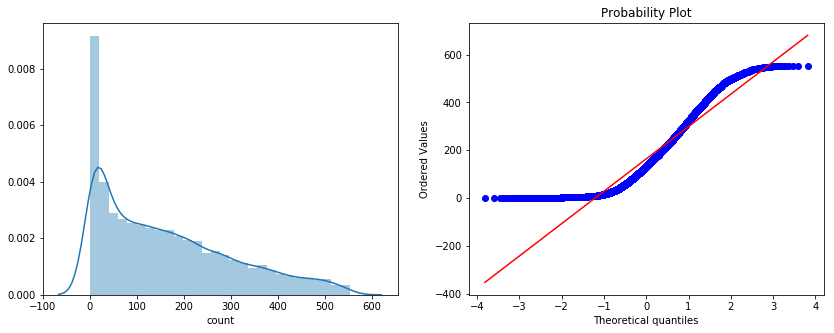

In [30]:
fig, ax = plt.subplots(1,2, figsize = (14,5))
sns.distplot(clean_train["count"], ax = ax[0])  
stats.probplot(clean_train["count"], dist="norm",fit=True, plot = ax[1])

print('Skewness :{:.3f}'.format(clean_train['count'].skew()))
print('Kurt : {:.3f}'.format(clean_train['count'].kurt()))

C:\Users\caffr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Skewness :-0.894
Kurt : -0.141


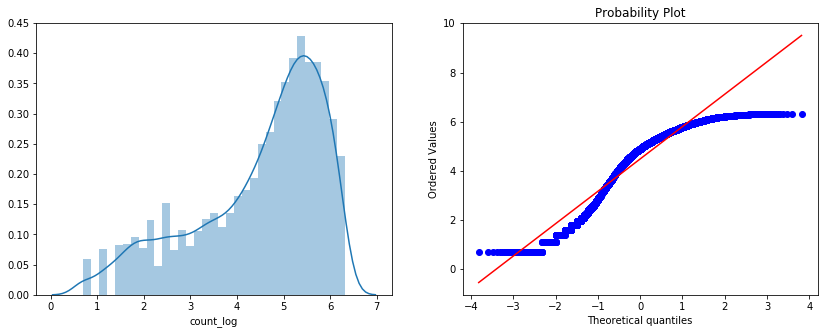

In [31]:
fig,ax=plt.subplots(1,2,figsize=(14,5))

clean_train['count_log'] = np.log1p(clean_train['count'])
sns.distplot(clean_train['count_log'],ax=ax[0])
stats.probplot(clean_train["count_log"], dist='norm', fit=True, plot=ax[1])

print('Skewness :{:.3f}'.format(clean_train['count_log'].skew()))
print('Kurt : {:.3f}'.format(clean_train['count_log'].kurt()))

# log transformation doesnt really help on this but still least it gets a bit

In [32]:
clean_train.weather.value_counts()

1    6738
2    2716
3     842
4       1
Name: weather, dtype: int64

'''
weather:
1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
'''

for the last step, i wanted to redefined the season, saying that i will make 12~2 into winter, 3~5 spring, 6~8 summer and 9~11 autumn

In [86]:
def my_seasons(mon):
    if mon in [12,1,2]:
        return 4 
    elif mon in [3,4,5]:
        return 1 
    elif mon in [6,7,8]:
        return 2 
    else: 
        return 3

    
clean_train['season'] = clean_train['month'].apply(lambda x: my_seasons(x))
pivot_tab('season')


,count
season,
1,154.843933
2,200.989715
3,182.359338
4,120.142054


Coming back to windspeed== 0; there were too many windspeed == 0. 

This could be either accurately measured to be 0 or inaccruately measured to be 0 for whatever the reasons. 

So, worth to take a look at it!

In [87]:
#clean_train[clean_train['windspeed'] !=0].groupby('windspeed')['count'].count()

print('windspeed NOT 0 : {}' .format(clean_train[clean_train['windspeed'] !=0]['count'].sum()))
print('windspeed IS 0 : {}' .format(clean_train[clean_train['windspeed'] ==0]['count'].sum()))

a = clean_train[clean_train['windspeed'] !=0]['count'].sum()
b = clean_train[clean_train['windspeed'] ==0]['count'].sum()
print('Windspeed == 0 is about : {:.3f}' .format(b/a * 100) + "% of the windspeed")

windspeed NOT 0 : 1513502
windspeed IS 0 : 174832
Windspeed == 0 is about : 11.551% of the windspeed


In [109]:
# filling out the windspeed == 0 by applying rf. 
from sklearn.ensemble import RandomForestRegressor

#windspeed == 0
windspeed_0 = clean_train[clean_train.windspeed == 0]
#Windspeed != 0 
windspeed_Not0 = clean_train[clean_train.windspeed != 0]

#Removing the columns as a prep 
windspeed_0_df = windspeed_0.drop(['holiday','workingday','windspeed','casual','registered','count','datetime','date'],axis=1)

#Except for Windspeed Series, dropping the unneeded columns to make it same as above
windspeed_Not0_df = windspeed_Not0.drop(['holiday','workingday','windspeed','casual','registered','count','datetime','date'],axis=1)



In [107]:
# make just very simple RF model. That is, use the default version instead of defining any number of trees or state
rf = RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0['windspeed'] )
#apply Windspeed != 0 to predict
predicted_windspeed_0 = rf.predict(windspeed_0_df)


C:\Users\caffr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required.

In [40]:
# finally applying the predicted value to the windspeed = 0 
windspeed_0['windspeed'] = predicted_windspeed_0
windspeed_0['windspeed']

C:\Users\caffr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0         9.30228
1         7.00217
2         7.00217
3        11.00207
4         7.70165
6         9.20178
7         8.00114
8         6.50235
9        14.79963
64        6.90167
89        7.80081
92        7.40149
114       9.80143
115       9.60110
116       7.20116
117       6.90167
121       7.50132
122       9.20111
123       7.50199
124       6.50235
126      10.60074
129      11.90121
142      12.20003
143       7.30166
154       9.10061
163       7.90198
238       8.89894
250       9.40144
306       9.60110
308      10.29991
           ...   
10698    11.89987
10706     7.20116
10707     7.20116
10708     7.20116
10738     7.70031
10739     6.20286
10741     8.50163
10744     6.20286
10766     8.70129
10768     6.80251
10769     8.50096
10771     9.00078
10772     7.20183
10781    11.70088
10790     9.30094
10794     6.70201
10795     6.70201
10796     6.90234
10810    10.79973
10811     9.99975
10814     8.20147
10816     7.40082
10817     7.60048
10818    11.10190
10819     

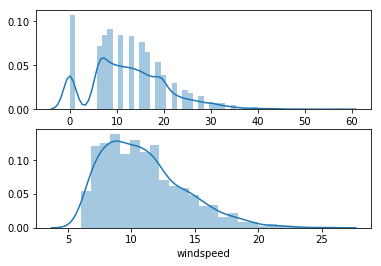

In [88]:
plt.subplot(2, 1, 1)
sns.distplot(clean_train.windspeed)

plt.subplot(2, 1, 2)
sns.distplot(windspeed_0.windspeed)
# ok! finally it looks better!!! Now plug it back to the clean_train             

In [90]:
clean_train = pd.concat([windspeed_0,windspeed_Not0],axis=0)
clean_train = clean_train.sort_values(by=['datetime'])

In [93]:
clean_train.info() #OK perfect! 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10297 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10297 non-null object
season        10297 non-null int64
holiday       10297 non-null category
workingday    10297 non-null category
weather       10297 non-null category
temp          10297 non-null float64
atemp         10297 non-null float64
humidity      10297 non-null int64
windspeed     10297 non-null float64
casual        10297 non-null int64
registered    10297 non-null int64
count         10297 non-null int64
date          10297 non-null datetime64[ns]
hour          10297 non-null int32
year          10297 non-null int32
month         10297 non-null int32
day           10297 non-null int32
weekday       10297 non-null category
count_log     10297 non-null float64
dtypes: category(4), datetime64[ns](1), float64(4), int32(4), int64(5), object(1)
memory usage: 1.1+ MB


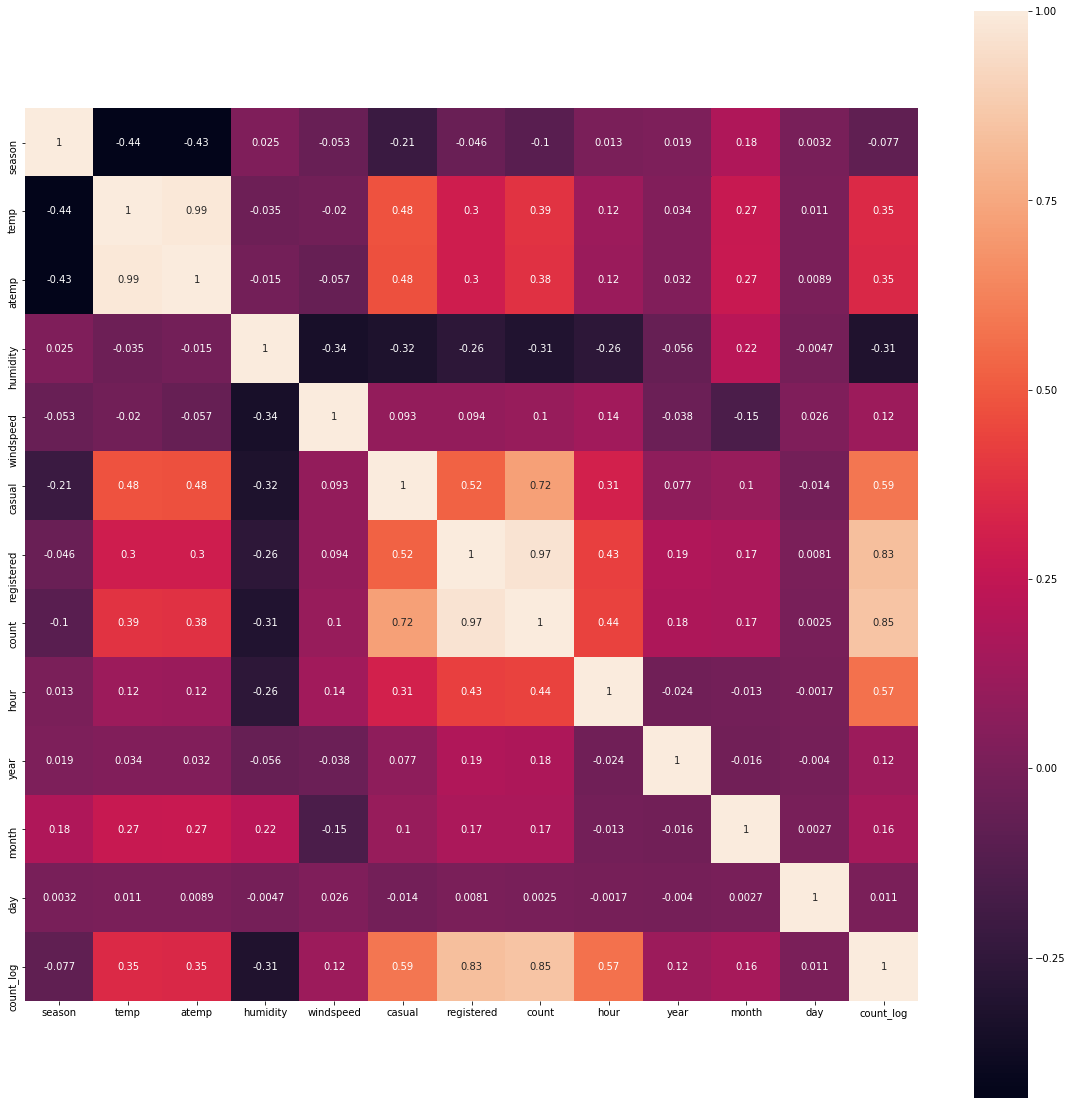

In [95]:
pp = plt.figure(figsize=[20,20])
pp = sns.heatmap(train.corr(),annot=True,square=True)

Now, everything is ready! apply the previous steps to all the data, test and train both! 

In [164]:
train = pd.read_csv('train.zip')
test = pd.read_csv('test.zip')

dat = pd.concat([train, test], axis= 0, sort= False) #dat2 = train.append(test, sort= False)

In [165]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
datetime      17379 non-null object
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        10886 non-null float64
registered    10886 non-null float64
count         10886 non-null float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [166]:
dat['datetime'] = pd.to_datetime(dat['datetime'],errors='coerce')
dat['date'] = dat['datetime'].apply(lambda x:x.date())
dat['year'] = dat['datetime'].apply(lambda x:x.year)
dat['month'] = dat['datetime'].apply(lambda  x:x.month)
dat['day'] = dat['datetime'].apply(lambda  x:x.day)
dat['weekday'] = dat['datetime'].apply(lambda  x:x.weekday())
dat['hour'] = dat['datetime'].apply(lambda  x:x.hour).astype('int')

In [167]:
dat.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
datetime      17379 non-null datetime64[ns]
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        10886 non-null float64
registered    10886 non-null float64
count         10886 non-null float64
date          17379 non-null object
year          17379 non-null int64
month         17379 non-null int64
day           17379 non-null int64
weekday       17379 non-null int64
hour          17379 non-null int32
dtypes: datetime64[ns](1), float64(6), int32(1), int64(9), object(1)
memory usage: 2.5+ MB


In [171]:
category_columns = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numerical_columns = ["temp","humidity","windspeed","atemp"]
drop_columns = ['datetime','casual','registered','count','date']

for col in category_columns:
    dat[col] = dat[col].astype('category')

In [172]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
datetime      17379 non-null datetime64[ns]
season        17379 non-null category
holiday       17379 non-null category
workingday    17379 non-null category
weather       17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        10886 non-null float64
registered    10886 non-null float64
count         10886 non-null float64
date          17379 non-null object
year          17379 non-null category
month         17379 non-null category
day           17379 non-null int64
weekday       17379 non-null category
hour          17379 non-null category
dtypes: category(8), datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 1.6+ MB


In [173]:
from sklearn.ensemble import RandomForestRegressor 

windspeed_Not0, windspeed_Not0_series

datWind0 = dat[dat["windspeed"]==0]
datWindNot0 = dat[dat["windspeed"]!=0]

datWind0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,1,1,5,4


In [175]:
datWindNot0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,weekday,hour
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.0,1.0,1.0,2011-01-01,2011,1,1,5,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12.0,24.0,36.0,2011-01-01,2011,1,1,5,10
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26.0,30.0,56.0,2011-01-01,2011,1,1,5,11
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29.0,55.0,84.0,2011-01-01,2011,1,1,5,12
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47.0,47.0,94.0,2011-01-01,2011,1,1,5,13


In [176]:
rf = RandomForestRegressor()
windrelated = ["season","weather","humidity","month","temp","year","atemp", "hour"]
rf.fit(datWindNot0[windrelated], datWindNot0["windspeed"])

predicted_wind = rf.predict(X= datWind0[windrelated])
print(predicted_wind)
datWind0["windspeed"] = predicted_wind # applying the predicted windspeed into the windspeed == 0


C:\Users\caffr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[ 6.0032   6.0032   6.0032  ...  8.60213 21.30064  8.20013]


C:\Users\caffr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [178]:
dat = datWindNot0.append(datWind0)
dat.reset_index(inplace=True)
dat.drop('index',inplace=True,axis=1)

In [179]:
dat.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,weekday,hour
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.0,1.0,1.0,2011-01-01,2011,1,1,5,5
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12.0,24.0,36.0,2011-01-01,2011,1,1,5,10
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26.0,30.0,56.0,2011-01-01,2011,1,1,5,11


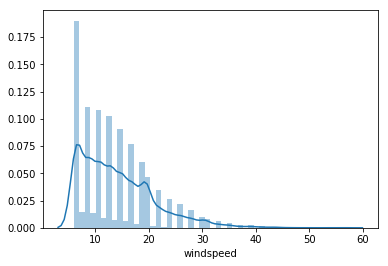

In [180]:
sns.distplot(dat.windspeed)

In [181]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
datetime      17379 non-null datetime64[ns]
season        17379 non-null category
holiday       17379 non-null category
workingday    17379 non-null category
weather       17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        10886 non-null float64
registered    10886 non-null float64
count         10886 non-null float64
date          17379 non-null object
year          17379 non-null category
month         17379 non-null category
day           17379 non-null int64
weekday       17379 non-null category
hour          17379 non-null category
dtypes: category(8), datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 1.5+ MB


In [182]:
train = dat[pd.notnull(dat['count'])].sort_values(by='datetime')
test = dat[~pd.notnull(dat['count'])].sort_values(by='datetime')

In [185]:
datetimecol = test["datetime"]
yLabels = train["count"]
yLablesRegistered = train["registered"]
yLablesCasual = train["casual"]

In [187]:
# finally dropping the unnecessary columns: 
drop_columns = ['datetime','casual','registered','count','date']
train  = train.drop(drop_columns,axis=1)
test  = test.drop(drop_columns,axis=1)

In [188]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,weekday,hour
15199,1,0,0,1,9.84,14.395,81,6.00320,2011,1,1,5,0
15200,1,0,0,1,9.02,13.635,80,6.00320,2011,1,1,5,1
15201,1,0,0,1,9.02,13.635,80,6.00320,2011,1,1,5,2
15202,1,0,0,1,9.84,14.395,75,6.00320,2011,1,1,5,3
15203,1,0,0,1,9.84,14.395,75,6.10303,2011,1,1,5,4


In [189]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,weekday,hour
9573,1,0,1,1,10.66,11.365,56,26.00270,2011,1,20,3,0
16512,1,0,1,1,10.66,13.635,56,8.49895,2011,1,20,3,1
16513,1,0,1,1,10.66,13.635,56,8.49895,2011,1,20,3,2
9574,1,0,1,1,10.66,12.880,56,11.00140,2011,1,20,3,3
9575,1,0,1,1,10.66,12.880,56,11.00140,2011,1,20,3,4


In [190]:
# RMSLE : https://programmers.co.kr/learn/courses/21/lessons/943

'''
it penalties the overestimated and underestimated values both  
'''
# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [191]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

lr = LinearRegression()

#np.log1p = np.log(1+x). If x = 0 and if its loged, then it will become neg. infinity; hence use np.log1p. 
yLabelslog = np.log1p(yLabels)

lr.fit(train,yLabelslog)
preds = lr.predict(train)

print('RMSLE Value For Linear Regression: {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value For Linear Regression: 0.977607821231708


In [232]:
from sklearn.model_selection import GridSearchCV # this will spit out the optimized parameter 
from sklearn import metrics
import warnings

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

ridge = Ridge()

ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,
                          ridge_params,
                          scoring =rmsle_scorer,
                          cv=5)

grid_ridge.fit(train,yLabelslog)
preds = grid_ridge.predict(train)
print(grid_ridge.best_params_)
print('RMSLE Value for Ridge Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value for Ridge Regression 0.9776078210816153


In [234]:
lasso = Lasso()

lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid_lasso = GridSearchCV(lasso,
                          lasso_params,
                          scoring=rmsle_scorer,
                          cv=5)

grid_lasso.fit(train,yLabelslog)
preds = grid_lasso.predict(train)
print('RMSLE Value for Lasso Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for Lasso Regression 0.9778667268660083


In [236]:
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,
                       rf_params,
                       scoring=rmsle_scorer,
                       cv=5)
grid_rf.fit(train,yLabelslog)

preds = grid_rf.predict(train)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for RandomForest 0.10232994014369241


In [237]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,
                     gb_params,
                     scoring=rmsle_scorer,
                     cv=5)

grid_gb.fit(train,yLabelslog)
preds = grid_gb.predict(train)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for GradientBoosting 0.20635491300276163


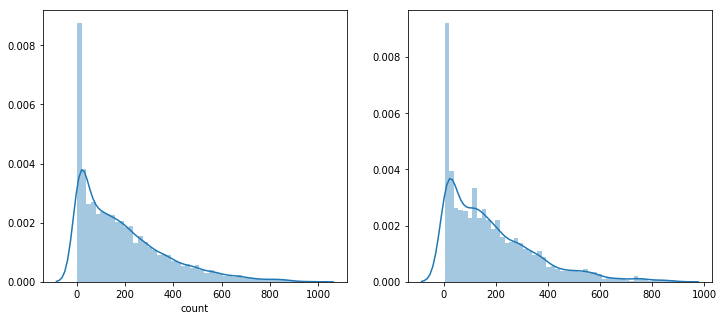

In [238]:
predsTest = grid_rf.predict(test)

fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.distplot(yLabels,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)

In [240]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('final submission.csv', index=False)

